In [4]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [5]:
import re
city_location = {
    '香港': (114.17, 22.28)
}
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [6]:
import re
city_location={
    '香港':(114.17,22.28)
}
pattern=re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
for line in coordination_source.split('\n'):
    city_info=pattern.findall(line)
    if not city_info:continue
    city, long, lat= city_info[0]
    long, lat= float(long), float(lat)
    city_location[city]= (long, lat)
city_location
    

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [7]:
import math
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])
get_geo_distance('上海','杭州')

153.5185697155768

In [8]:
! pip install networkx

In [9]:
import networkx as nx

In [10]:
import matplotlib
print(matplotlib.__path__)

['/Users/a1701210037/anaconda3/lib/python3.7/site-packages/matplotlib']


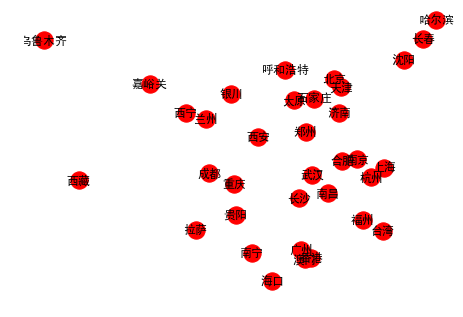

In [12]:
city_graph=nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(city_graph,city_location,with_labels=True,node_side=30)

In [13]:
threshold =300
city_connection = defaultdict(list)
for c1 in city_location:
    for c2 in city_location:
        if c1==c2:continue
        distance=get_geo_distance(c1,c2)
        if distance<threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)
city_connection

NameError: name 'defaultdict' is not defined

In [14]:
from collections import defaultdict
threshold = 300
city_connection = defaultdict(list)
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [39]:
city_connection

defaultdict(list,
            {'香港': ['广州', '长沙', '澳门', '广州', '长沙', '澳门'],
             '广州': ['香港', '香港', '长沙', '澳门', '长沙', '澳门'],
             '长沙': ['香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门'],
             '澳门': ['香港', '广州', '长沙', '香港', '广州', '长沙'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],

/Users/a1701210037/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


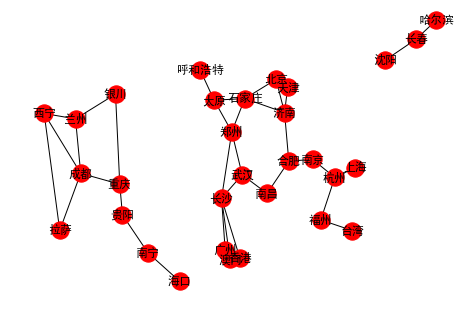

In [15]:
city_with_road=nx.Graph(city_connection)
nx.draw(city_with_road,city_location,with_labels=True,node_side=30)

In [16]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}
simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [18]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})
bfs(number_grpah, 2)

1
4
3
6
5
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [24]:
visited = [1]
if visited:
    print ('true')
else:
    print('false')
    
        

true


In [26]:
site= {'name': '菜鸟教程', 'alexa': 10000, 'url': 'www.runoob.com'}
pop_obj=site.pop('name')
print (pop_obj )

菜鸟教程


In [27]:
def search(start, destination, connection_graph, sort_candidate):
    pathes=[[start]]
    visited=set()
    while pathes:
        path=pathes.pop(0)
        froninter=path[-1]
        if froninter in visited:continue
        successors=connection_graph[froninter]
        for city in successors:
            if city in path: continue
            new_path=path +[city]
            pathes.append(new_path)
            if city== destination:return new_path
        visited.add(froninter)
        pathes=sort_candidate(pathes)

In [28]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [29]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [31]:
def pretty_print(cities):
    print('🚗->'.join(cities))
pretty_print(search('北京', '福州', simple_connection_info,sort_candidate=shortest_path_first))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


In [35]:
import requests
url='https://movie.douban.com/subject/26931786/?from=showing'
response=requests.get(url)
what_we_want=r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class=""'
pattern = re.compile(what_we_want)
likes = pattern.findall(response.text)
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


In [5]:
from sklearn.datasets import load_boston
data=load_boston()
x,y=data['data'],data['target']
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [6]:
y[1]

21.6

In [7]:
len(x[:,12])

506

In [8]:
"""x 总共有13列，也就是13个特征，每个
特征有506 个数据，也就是总共有506组数据，每组数据13个特征。"""

'x 总共有13列，也就是13个特征，每个\n特征有506 个数据，也就是总共有506组数据，每组数据13个特征。'

In [9]:
import matplotlib.pyplot as plt
def draw_rm_price():
    plt.scatter(x[:,5],y)

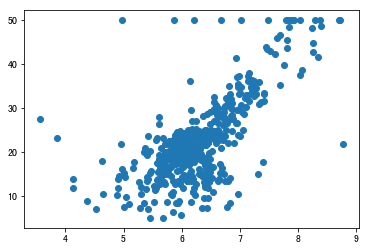

In [10]:
draw_rm_price()

In [24]:
import random
def price(rm,k,b):
    return k*rm+b

min_loss=43.606524 , k = 9 , b = -34


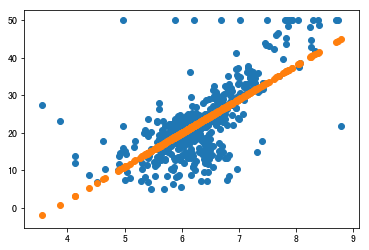

In [25]:
#随机取数
def loss_fun(y,k,b,x):
    y=list(y)
    x=list(x)
    loss=0
    for i in range(len(y)):
        delta=(y[i]-k*x[i]-b)**2
        loss+=delta
    return loss/float(len(y))
def min_loss_r(n,a):
    for i in range(n):
        k_rm=random.randint(-100,100)
        b_rm=random.randint(-100,100)
        y_rm=data['target']
        x_rm=data['data'][:,a]
        loss_test=loss_fun(y_rm,k_rm,b_rm,x_rm)
        if i ==0:
            loss_min=loss_test
            min_k=k_rm
            min_b=b_rm
        else:
            if loss_min>loss_test:
                loss_min=loss_test
                min_k=k_rm
                min_b=b_rm
    price_by_random_k_and_b=[price(r,min_k,min_b) for r in x_rm]
    draw_rm_price()
    plt.scatter(x_rm,price_by_random_k_and_b)
    print("min_loss=%f , k = %d , b = %d" %(loss_min, min_k, min_b)  )
min_loss_r(10000,5)

min_loss=72.229774 , k = 1 , b = 13


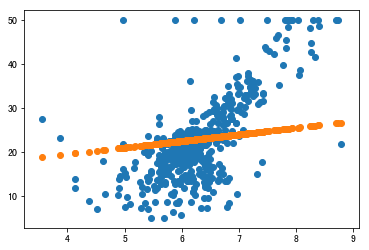

In [26]:
#监督方法
def min_loss_sup(n,a,rate):
    
    for i in range(n):
        if i==0:
            y_rm=data['target']
            x_rm=data['data'][:,a]
            
            k_s=random.randint(-100,100)
            b_s=random.randint(-100,100)
            loss_test1=loss_fun(y_rm,k_s,b_s,x_rm)
            loss_min=loss_test1
            min_k=k_s
            min_b=b_s
            K_s=min_k-rate
            B_s=min_b-rate
            loss_test=loss_fun(y_rm,K_s,B_s,x_rm)
        else:
            delta=loss_min-loss_test
            if delta >0:
                forward=-1
            else:
                forward=+1
            loss_min=loss_test
            min_k=K_s
            min_b=B_s
            K_s=min_k+rate*forward
            B_s=min_b+rate*forward
            loss_test=loss_fun(y_rm,K_s,B_s,x_rm)

    price_by_sup_k_and_b=[price(r,min_k,min_b) for r in x_rm]
    draw_rm_price()
    plt.scatter(x_rm,price_by_sup_k_and_b)
    print("min_loss=%f , k = %d , b = %d" %(loss_min, min_k, min_b)  )
min_loss_sup(10000,5,0.1)

In [53]:
#牛顿下降法

def partial_k(x,y,k,b):
    n=len(y)
    gradient=0
    y_hat = [price(r, k, b) for r in x]

    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient+=(y_i-y_hat_i)*x_i
    return -2/n*gradient
def partial_b(x,y,k,b):
    n=len(y)
    gradient=0
    y_hat = [price(r, k, b) for r in x]
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        a=y_i-y_hat_i
        gradient+=a
    return -2/n*gradient



min_loss=43.633871 , k = 9 , b = -36


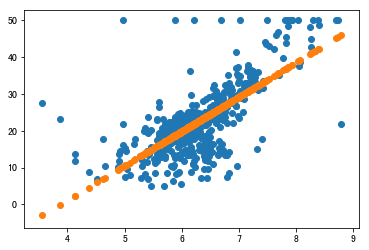

In [61]:
def min_loss_G(n,a,rate):
    
    
    y_rm=data['target']
    x_rm=data['data'][:,a]

    k_g=random.randint(-100,100)
    b_g=random.randint(-100,100)
    for i in range(n): 
        if i==0:
            loss_test1=loss_fun(y_rm,k_g,b_g,x_rm)
            loss_min=loss_test1
            min_k=k_g
            min_b=b_g
            K_g=min_k-rate*partial_k(x_rm,y_rm,k_g,b_g)
            B_g=min_b-rate*partial_b(x_rm,y_rm,k_g,b_g)
            loss_test=loss_fun(y_rm,K_g,B_g,x_rm)
        else:
            loss_min=loss_test
            min_k=K_g
            min_b=B_g
            K_g=min_k-rate*partial_k(x_rm,y_rm,K_g,B_g)
            B_g=min_b-rate*partial_b(x_rm,y_rm,K_g,B_g)
            loss_test=loss_fun(y_rm,K_g,B_g,x_rm)

    price_by_gra_k_and_b=[price(r,min_k,min_b) for r in x_rm]
    draw_rm_price()
    plt.scatter(x_rm,price_by_gra_k_and_b)
    print("min_loss=%f , k = %d , b = %d" %(loss_min, min_k, min_b)  )
min_loss_G(10000,5,0.01)